In [1]:
import numpy as np
import pandas as pd
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [2]:
#we can easily get the names of successful candidates here
#we use names so we can also easily crosscheck with the wiki adminship data
url = "https://en.wikipedia.org/w/api.php?action=query&list=categorymembers&cmtitle=Category:Successful_requests_for_adminship&cmlimit=20"
r = requests.get(url)
soup = BeautifulSoup(r.content, 'html.parser')
all_names = {}
for s in soup.find_all('span', {'class' : 's2'}):
  text = s.getText()
  if(text[1:19] != "Wikipedia:Requests"):
    continue
  print(s.getText()[34:-1])
  all_names[text] = {}

(aeropagitica)
@pple
^demon 2
^demon 3
0xDeadbeef
2over0
5 albert square
7 2
23skidoo
28bytes 2
52 Pickup
78.26
168...
172
331dot
A Man In Black
A. B.
AA
Aarktica 2


In [3]:
#wikipedia api has some limitation rate but we do not have that much data to scrape, it should be good
all_names = {"(aeropagitica)": {}}
for name in all_names:
  url = "https://en.wikipedia.org/w/api.php?action=parse&prop=text&page=Wikipedia:Requests_for_adminship/" + name + "&format=json"
  r = requests.get(url)
  soup = BeautifulSoup(r.content, 'html.parser')
  first_q = soup.find('b', string="1.").next_sibling
  question_one = ""
  while(first_q.name != "dl"):
    question_one += first_q.getText()
    first_q = first_q.next_sibling
  answer_one = first_q.getText()
  all_names[name][question_one] = answer_one


Currently we only will focus on the 3 default questions since it is the question that all candidates have in common which would help with the overall comparison.

In [4]:
for key, value in all_names["(aeropagitica)"].items():
  print(key)
  print(value)

 What sysop chores, if any, would you anticipate helping with? Please check out Category:Wikipedia backlog, and read the page about administrators and the administrators' reading list.\n
Closing WP:AFD debates.\nWatch and contribute to WP:ANI and WP:AN\nrollback button use against vandals.\nuse WP:VIP, WP:AIV and CryptoDerek's VandalFighter application to work against vandalism.\nBlocking vandal accounts.\ncategorising Uncategorised pages\nmonitoring recent changes.


In [5]:

# Parsing and importing datas
def parse_vote(vote_str):
    vote_dict = {}
    lines = vote_str.split('\n')
    for line in lines:
        if ':' in line:
            key, value = line.split(':', 1)
            vote_dict[key.strip()] = value.strip()
    return vote_dict

data = []
with gzip.open('wiki-RfA.txt.gz', 'rt') as file:
    content = file.read()

    # Split votes using blank lines
    votes = content.strip().split('\n\n')

    # Process each vote
    for vote in votes:
        vote_data = parse_vote(vote)
        data.append(vote_data)

df = pd.DataFrame(data)

df['VOT'] = pd.to_numeric(df['VOT'],errors='coerce')
df['RES'] = pd.to_numeric(df['RES'],errors='coerce')
df['YEA'] = pd.to_numeric(df['YEA'],errors='coerce')

df.head(10)

,SRC,TGT,VOT,RES,YEA,DAT,TXT
0,Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","'''Support''', with great pleasure. I work wit..."
5,Sven Manguard,BDD,1,1,2013,"01:53, 20 April 2013",'''Support''' There are plenty of important ro...
6,Ramaksoud2000,BDD,1,1,2013,"02:00, 20 April 2013",'''Support''' per noms. I don't see a reason n...
7,RockMagnetist,BDD,1,1,2013,"02:18, 20 April 2013",'''Support''' BDD already wields a broom pret...
8,Carrite,BDD,1,1,2013,"02:22, 20 April 2013",'''Support''' barring a completely unexpected ...
9,Someguy1221,BDD,1,1,2013,"03:09, 20 April 2013",'''Support''' because I see no good reason not...


In [6]:
comments = df[['TXT']]
print(len(np.unique(comments)))
print(len(comments))

163219
198275


In [7]:
def clean_txt_column(df):
    # Remove ''' - and -- characters
    df = df.str.replace(r"['-]+", "", regex=True)
    return df

In [8]:
df['TXT']=clean_txt_column(df['TXT'])

In [9]:
comments = df[['TXT']]
print(len(np.unique(comments)))
print(len(comments))

161755
198275


In [10]:
len(df[(df['TXT'].str.len()>6000)==True])

2

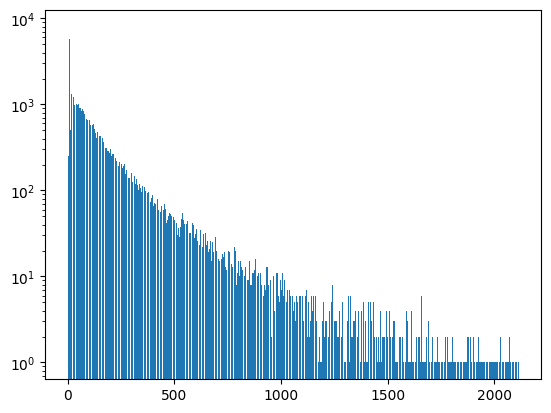

In [11]:
sizeOcomment =df['TXT'].str.len()
unique, counts = np.unique(sizeOcomment, return_counts=True)
values = dict(zip(unique, counts))

plt.bar(range(len(values)), list(values.values()), log=True)
plt.show()

In [12]:
print(df.head())
print(df.info())
print(df.describe())

          SRC  TGT  VOT  RES   YEA                   DAT  \
0   Steel1943  BDD    1    1  2013  23:13, 19 April 2013   
1  Cuchullain  BDD    1    1  2013  01:04, 20 April 2013   
2   INeverCry  BDD    1    1  2013  23:43, 19 April 2013   
3   Cncmaster  BDD    1    1  2013  00:11, 20 April 2013   
4  Miniapolis  BDD    1    1  2013  00:56, 20 April 2013   

                                                 TXT  
0                                  Support as conom.  
1                              Support as nominator.  
2                                  Support per noms.  
3  Support per noms. BDD is a strong contributor ...  
4  Support, with great pleasure. I work with BDD ...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198275 entries, 0 to 198274
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   SRC     198275 non-null  object
 1   TGT     198275 non-null  object
 2   VOT     198275 non-null  int64 
 3   RES     1

In [13]:
print(df.isnull().sum())

SRC    0
TGT    0
VOT    0
RES    0
YEA    0
DAT    0
TXT    0
dtype: int64


In [14]:
print(df.describe())

                 VOT            RES            YEA
count  198275.000000  198275.000000  198275.000000
mean        0.520867       0.243606    2007.488851
std         0.815420       0.969877       2.021279
min        -1.000000      -1.000000    2003.000000
25%         0.000000      -1.000000    2006.000000
50%         1.000000       1.000000    2007.000000
75%         1.000000       1.000000    2009.000000
max         1.000000       1.000000    2013.000000


In [15]:
print(df[['SRC']].value_counts())

SRC            
                   1661
Siva1979           1232
Mailer diablo       998
Merovingian         916
Wizardman           810
                   ... 
Kjp993                1
Kirper                1
Kirachinmoku          1
Kintetsubuffalo       1
완젬스                   1
Name: count, Length: 10417, dtype: int64


In [16]:
print(df[['TGT']].value_counts())

TGT              
Everyking            987
TenPoundHammer       778
MZMcBride            663
Cobi                 639
Elonka               628
                    ... 
Mrmewe                 1
Wikitank               1
I am watching you      1
Nat.tang               1
Weyes3                 1
Name: count, Length: 3497, dtype: int64


In [17]:
print(df[['VOT']].value_counts())

VOT
 1     144451
-1      41176
 0      12648
Name: count, dtype: int64


In [18]:
print(df[['RES']].value_counts())

RES
 1     123288
-1      74987
Name: count, dtype: int64


In [19]:
print(df[['YEA']].value_counts())

YEA 
2006    45325
2007    41541
2008    30479
2009    21375
2005    20239
2010    13970
2011     8556
2004     6541
2012     6474
2013     3572
2003      203
Name: count, dtype: int64


In [20]:
df['TXT'].head()

,TXT
0,Support as conom.
1,Support as nominator.
2,Support per noms.
3,Support per noms. BDD is a strong contributor ...
4,"Support, with great pleasure. I work with BDD ..."


In [21]:
print(df[['TXT']].value_counts())

TXT                                                                                                                                                                                                                                                                                                                                                                                                           
                                                                                                                                                                                                                                                                                                                                                                                                                  8053
Support                                                                                                                                                                                           

In [22]:
# Count the number of unique interactions per user
user_interactions = df.groupby('SRC')['VOT'].count()
print(user_interactions.describe())

count    10417.000000
mean        19.033791
std         53.000534
min          1.000000
25%          1.000000
50%          3.000000
75%         13.000000
max       1661.000000
Name: VOT, dtype: float64


In [23]:
import networkx as nx

In [24]:
# Create a directed graph if columns include 'from_user', 'to_user'
G = nx.from_pandas_edgelist(df, source='SRC', target='TGT', create_using=nx.DiGraph())

In [25]:
print(f"Graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

Graph with 11381 nodes and 189003 edges.


In [26]:
# Display sample node and edge data
print("Sample nodes:", list(G.nodes())[:5])
print("Sample edges:", list(G.edges())[:5])

# Print degree distribution summary
degree_sequence = [d for n, d in G.degree()]
print(f"Average degree: {sum(degree_sequence) / len(degree_sequence):.2f}")


Sample nodes: ['Steel1943', 'BDD', 'Cuchullain', 'INeverCry', 'Cncmaster']
Sample edges: [('Steel1943', 'BDD'), ('Steel1943', 'RockMagnetist'), ('Steel1943', 'Shirt58'), ('Steel1943', 'Jasper Deng'), ('BDD', 'Miniapolis')]
Average degree: 33.21


In [27]:
from collections import Counter
from nltk.corpus import stopwords
import nltk

In [28]:
# Download NLTK data
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
stop_words = set(stopwords.words('english'))
all_words = ' '.join(df['TXT']).lower().split()
print(Counter([word for word in all_words if word not in stop_words]).most_common(10))

[('support', 90883), ('good', 38389), ('support.', 32609), ('oppose', 31685), ('per', 22138), ('would', 20451), ('admin', 17935), ('see', 17098), ('user', 16913), ('like', 15344)]


In [30]:
stop_words = set(stopwords.words('english'))
# Define a function to remove stop words from a sentence
def remove_stop_words(sentence):
  # Split the sentence into individual words
  words = sentence.split()

  # Use a list comprehension to remove stop words
  filtered_words = [word for word in words if word not in stop_words]

  # Join the filtered words back into a sentence
  return ' '.join(filtered_words)

df["Comment_no_stopword"] = df['TXT'].apply(remove_stop_words)

In [31]:
df

,SRC,TGT,VOT,RES,YEA,DAT,TXT,Comment_no_stopword
0,Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",Support as conom.,Support conom.
1,Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",Support as nominator.,Support nominator.
2,INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",Support per noms.,Support per noms.
3,Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",Support per noms. BDD is a strong contributor ...,Support per noms. BDD strong contributor thous...
4,Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","Support, with great pleasure. I work with BDD ...","Support, great pleasure. I work BDD [[WP:GOCE|..."
...,...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,"02:51, 2 Sep 2003",Support,Support
198271,Angela,WhisperToMe,1,1,2003,"23:45, 26 Nov 2003",Support.,Support.
198272,Jiang,WhisperToMe,1,1,2003,,Support.,Support.
198273,Pakaran,WhisperToMe,1,1,2003,"05:38, 5 Dec 2003",Support. Age has nothing to do with maturity.,Support. Age nothing maturity.


Sentiment analysis

In [32]:
!pip install transformers

In [37]:
from transformers import AutoTokenizer, pipeline
#from transformers import AutoModelForSequenceClassification #to use a longformer, not needed yet
import torch

In [38]:
#Splitting b
random_df = df.sample(frac=0.1)
random_df
# Full dataset is too long for the sentiment analysis to run in a short time, for testing purposes we use a random subsample of the data

,SRC,TGT,VOT,RES,YEA,DAT,TXT,Comment_no_stopword
100538,Daniel,Mr.Z-man,1,1,2007,"03:52, 3 June 2007",A very good candidate.,A good candidate.
122799,Angusmclellan,ST47,-1,-1,2007,"13:02, 21 February 2007","Oppose. Before I read this, I was inclined to ...","Oppose. Before I read this, I inclined support..."
8358,NativeForeigner,LuK3,0,-1,2012,"08:47, 3 December 2012","I see no real concern in contributions, but th...","I see real concern contributions, important qu..."
39218,Garden,Mlaffs,1,1,2009,"21:29, 24 June 2009",Cant see anything that would make me oppose. ...,Cant see anything would make oppose. Good luck!
57214,Katalaveno,Davidgothberg,1,1,2008,"11:35, 5 April 2008",Support Solid. Trustworthy. Careful. Honest. S...,Support Solid. Trustworthy. Careful. Honest. S...
...,...,...,...,...,...,...,...,...
195970,Anthony DiPierro,SWAdair,0,1,2004,"02:59, 28 Oct 2004",Im torn between my belief that adminship shoul...,Im torn belief adminship shouldnt political po...
134033,Dewet,Ezeu,1,1,2006,"21:49, 27 April 2006",Support Good editor and vandal patroller; wev...,Support Good editor vandal patroller; weve cro...
13983,Off2riorob,Rannpháirtí anaithnid,1,1,2011,"02:17, 9 September 2011",Support User seems able enough and willing to...,Support User seems able enough willing take ti...
112001,GRBerry,Betacommand,-1,-1,2007,"20:23, 7 September 2007",Oppose The notion that we should disregard the...,Oppose The notion disregard preArbComm behavio...


In [39]:
device = 0 if torch.cuda.is_available() else -1
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
def tokenize_text(text):
    return tokenizer.encode(text, add_special_tokens=True, truncation=True, max_length=512)
#df['tokenized'] = df['TXT'].apply(tokenize_text)#actually not needed as sentiment_analysis works on raw text,
#but at least we know it works
sentiment_analyzer = pipeline("sentiment-analysis", truncation=True, max_length = 512, device=device)
results = sentiment_analyzer(random_df['TXT'].tolist()) #512 with shorter model did not work
random_df['sentiment'] = [result['label'] for result in results]
random_df['confidence'] = [result['score'] for result in results]
random_df

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


,SRC,TGT,VOT,RES,YEA,DAT,TXT,Comment_no_stopword,sentiment,confidence
100538,Daniel,Mr.Z-man,1,1,2007,"03:52, 3 June 2007",A very good candidate.,A good candidate.,POSITIVE,0.999864
122799,Angusmclellan,ST47,-1,-1,2007,"13:02, 21 February 2007","Oppose. Before I read this, I was inclined to ...","Oppose. Before I read this, I inclined support...",POSITIVE,0.997624
8358,NativeForeigner,LuK3,0,-1,2012,"08:47, 3 December 2012","I see no real concern in contributions, but th...","I see real concern contributions, important qu...",POSITIVE,0.990393
39218,Garden,Mlaffs,1,1,2009,"21:29, 24 June 2009",Cant see anything that would make me oppose. ...,Cant see anything would make oppose. Good luck!,POSITIVE,0.998463
57214,Katalaveno,Davidgothberg,1,1,2008,"11:35, 5 April 2008",Support Solid. Trustworthy. Careful. Honest. S...,Support Solid. Trustworthy. Careful. Honest. S...,POSITIVE,0.995697
...,...,...,...,...,...,...,...,...,...,...
195970,Anthony DiPierro,SWAdair,0,1,2004,"02:59, 28 Oct 2004",Im torn between my belief that adminship shoul...,Im torn belief adminship shouldnt political po...,NEGATIVE,0.995863
134033,Dewet,Ezeu,1,1,2006,"21:49, 27 April 2006",Support Good editor and vandal patroller; wev...,Support Good editor vandal patroller; weve cro...,POSITIVE,0.999229
13983,Off2riorob,Rannpháirtí anaithnid,1,1,2011,"02:17, 9 September 2011",Support User seems able enough and willing to...,Support User seems able enough willing take ti...,POSITIVE,0.999448
112001,GRBerry,Betacommand,-1,-1,2007,"20:23, 7 September 2007",Oppose The notion that we should disregard the...,Oppose The notion disregard preArbComm behavio...,NEGATIVE,0.999745


In [40]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans

# Load the spacy model
nlp = spacy.load("en_core_web_sm")

# Sample question and answer pairs
qa_pairs = [
    ('What is the most difficult situation you have had to handle as an editor?',
     'Handling conflicting deadlines and managing team expectations.'),
    ('How much time do you have to be doing administrator work?',
     'It varies, but it is very demanding and takes up to 50% of my schedule.')
]

# Combine question and answer pairs into one text block
texts = [f"{q} {a}" for q, a in qa_pairs]

# Vectorize the combined text
vectorizer = TfidfVectorizer(stop_words="english")
vectors = vectorizer.fit_transform(texts)

# Option 1: Use LDA for topic extraction
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(vectors)

# Print topics with keywords
print("Topics extracted using LDA:")
for idx, topic in enumerate(lda.components_):
    keywords = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:]]
    print(f"Topic {idx + 1}: {', '.join(keywords)}")

# Option 2: Use KMeans for clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(vectors)

# Print clusters and associated texts
print("\nClusters extracted using KMeans:")
for i, cluster in enumerate(clusters):
    print(f"Cluster {cluster + 1}: {texts[i]}")


Topics extracted using LDA:
Topic 1: work, varies, demanding, 50, schedule
Topic 2: difficult, managing, team, handle, handling

Clusters extracted using KMeans:
Cluster 1: What is the most difficult situation you have had to handle as an editor? Handling conflicting deadlines and managing team expectations.
Cluster 2: How much time do you have to be doing administrator work? It varies, but it is very demanding and takes up to 50% of my schedule.
